## How to Train YOLOv8 Object Detection on a Custom Dataset

In [ ]:
!nvidia-smi

Tue Oct 10 12:46:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 9.5 MB/s eta 0:00:00


## Install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
#!yolo mode=checks

## Train YOLOv8 Model on Custom Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0LdY9PIK4CWIaAcf6fs9")
project = rf.workspace("new-workspace-csmgu").project("weedcrop-waifl")
dataset = project.version(2).download("yolov8")

In [ ]:
dataset.location

'/content/WeedCrop-2'

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=128

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/WeedCrop-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=128

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/WeedCrop-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

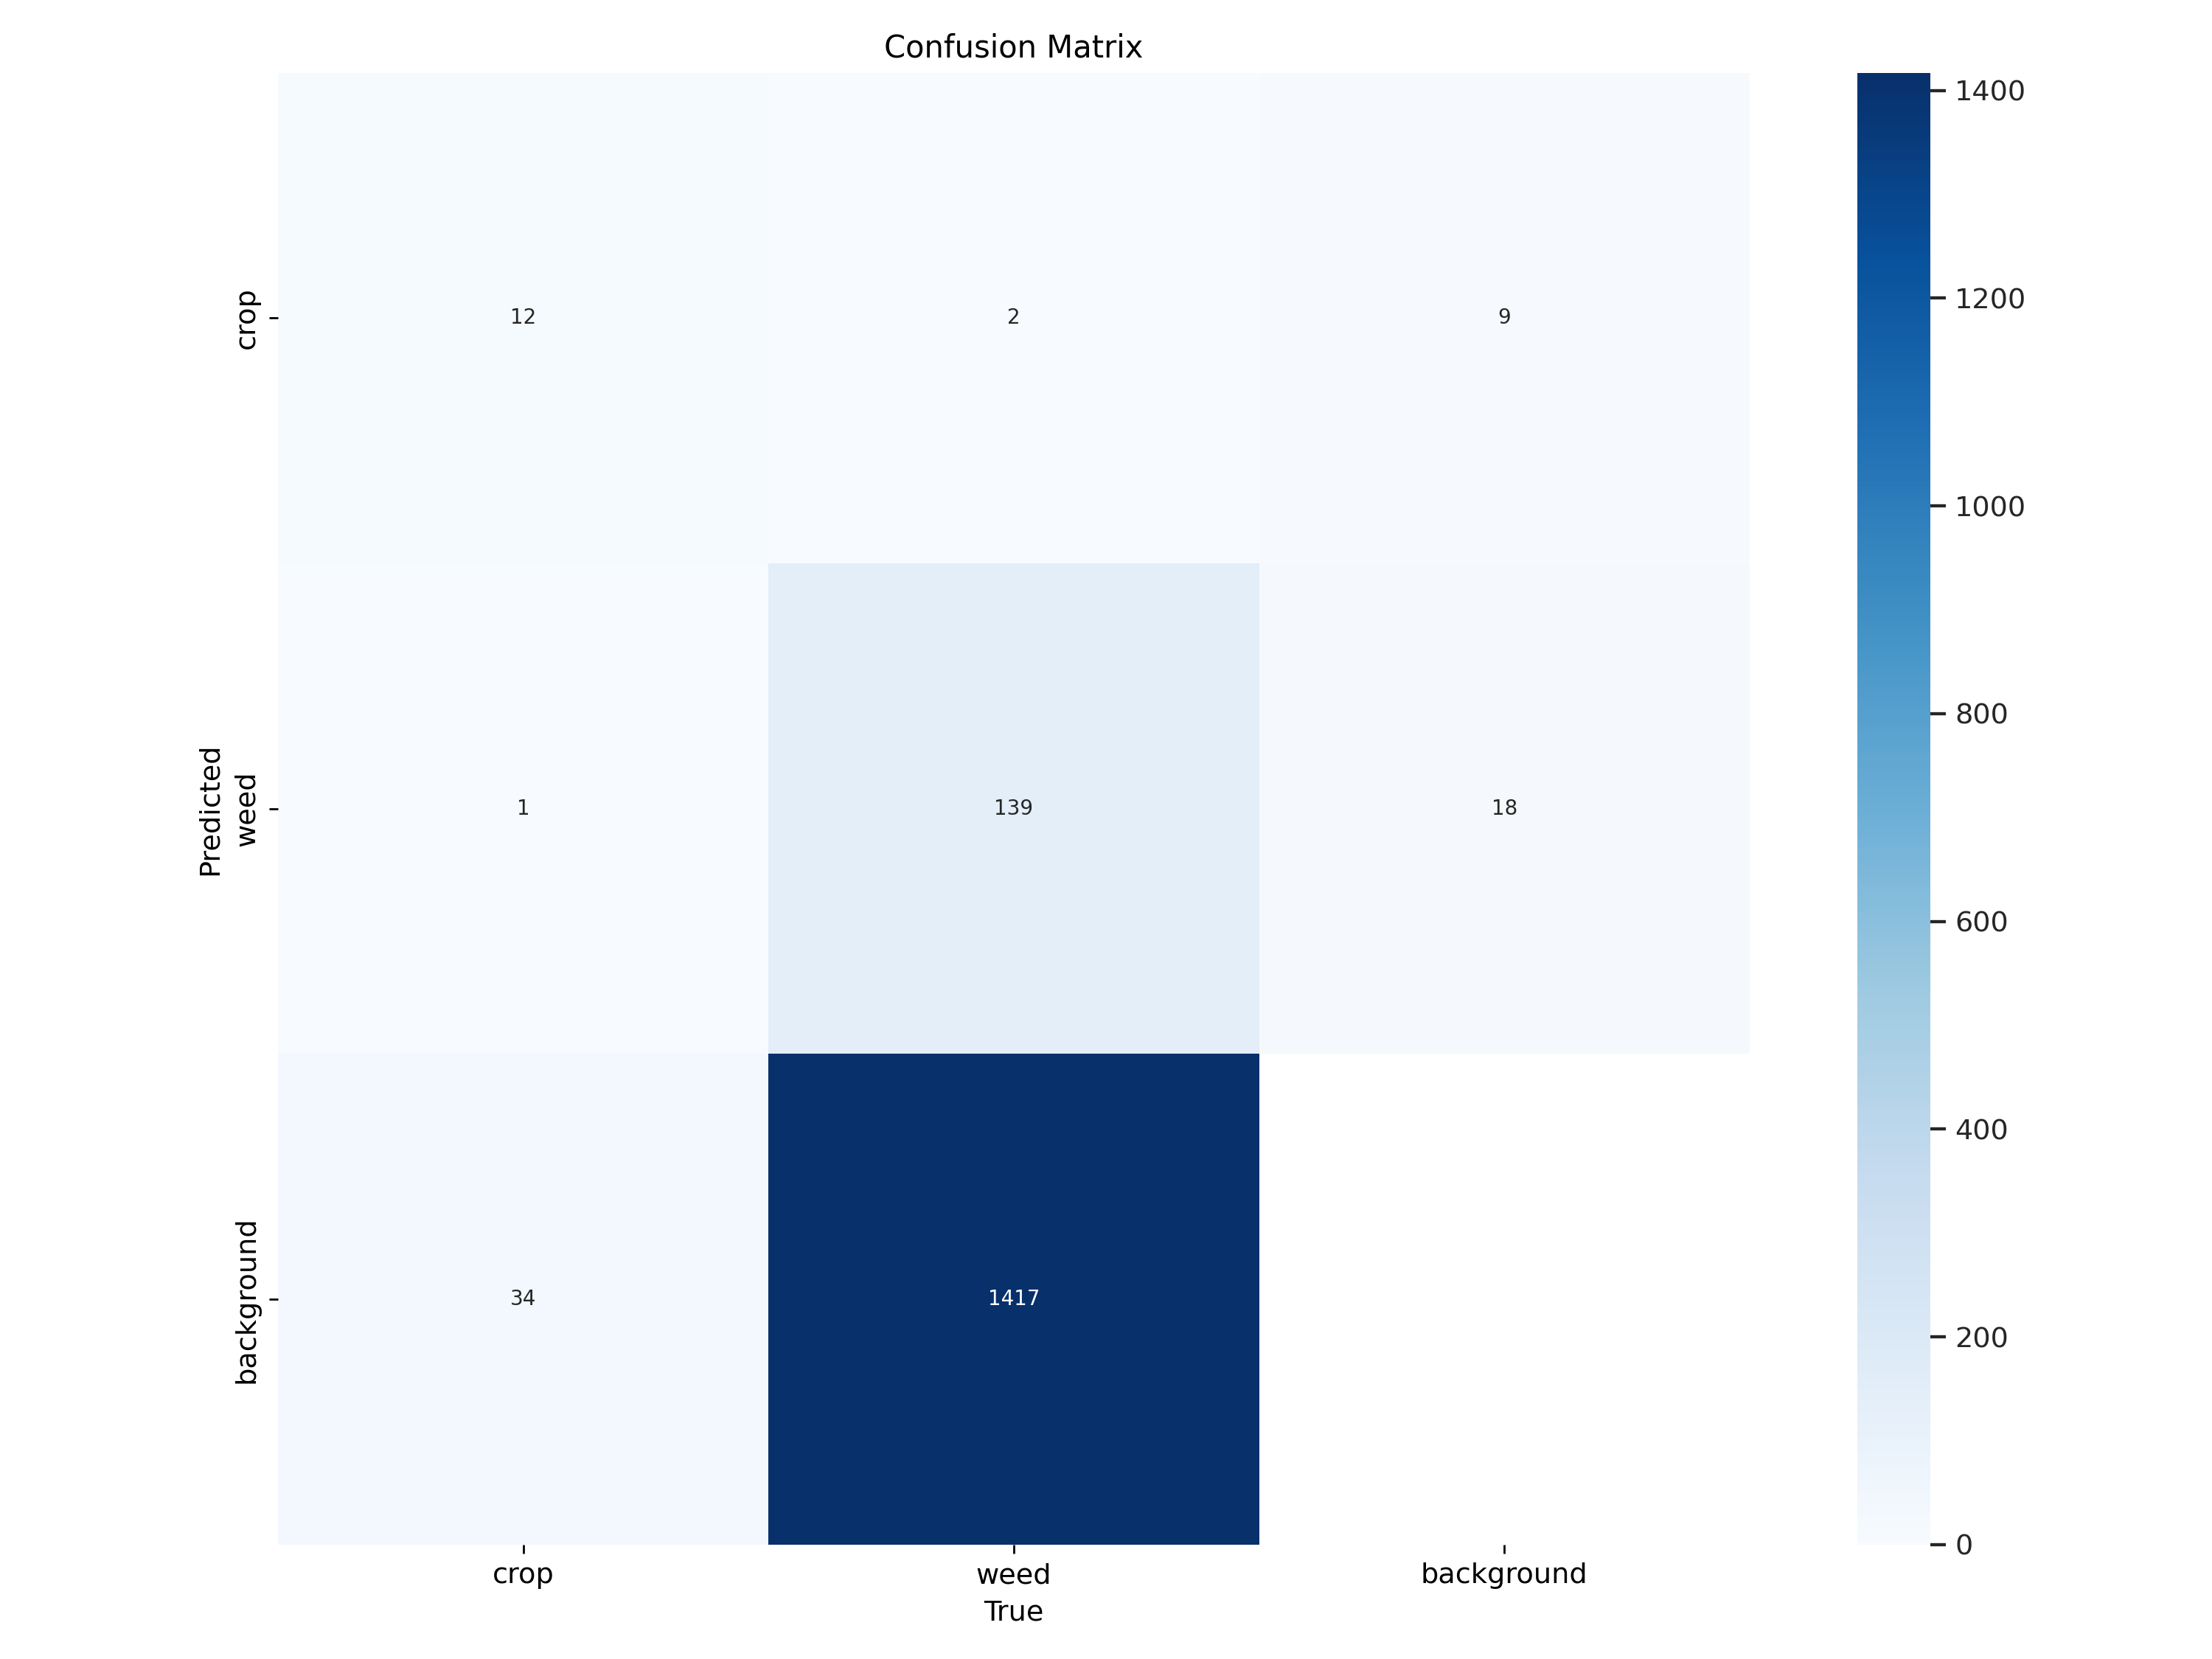

In [ ]:
Image(filename=f'/content/runs/detect/train4/confusion_matrix.png', width=600)

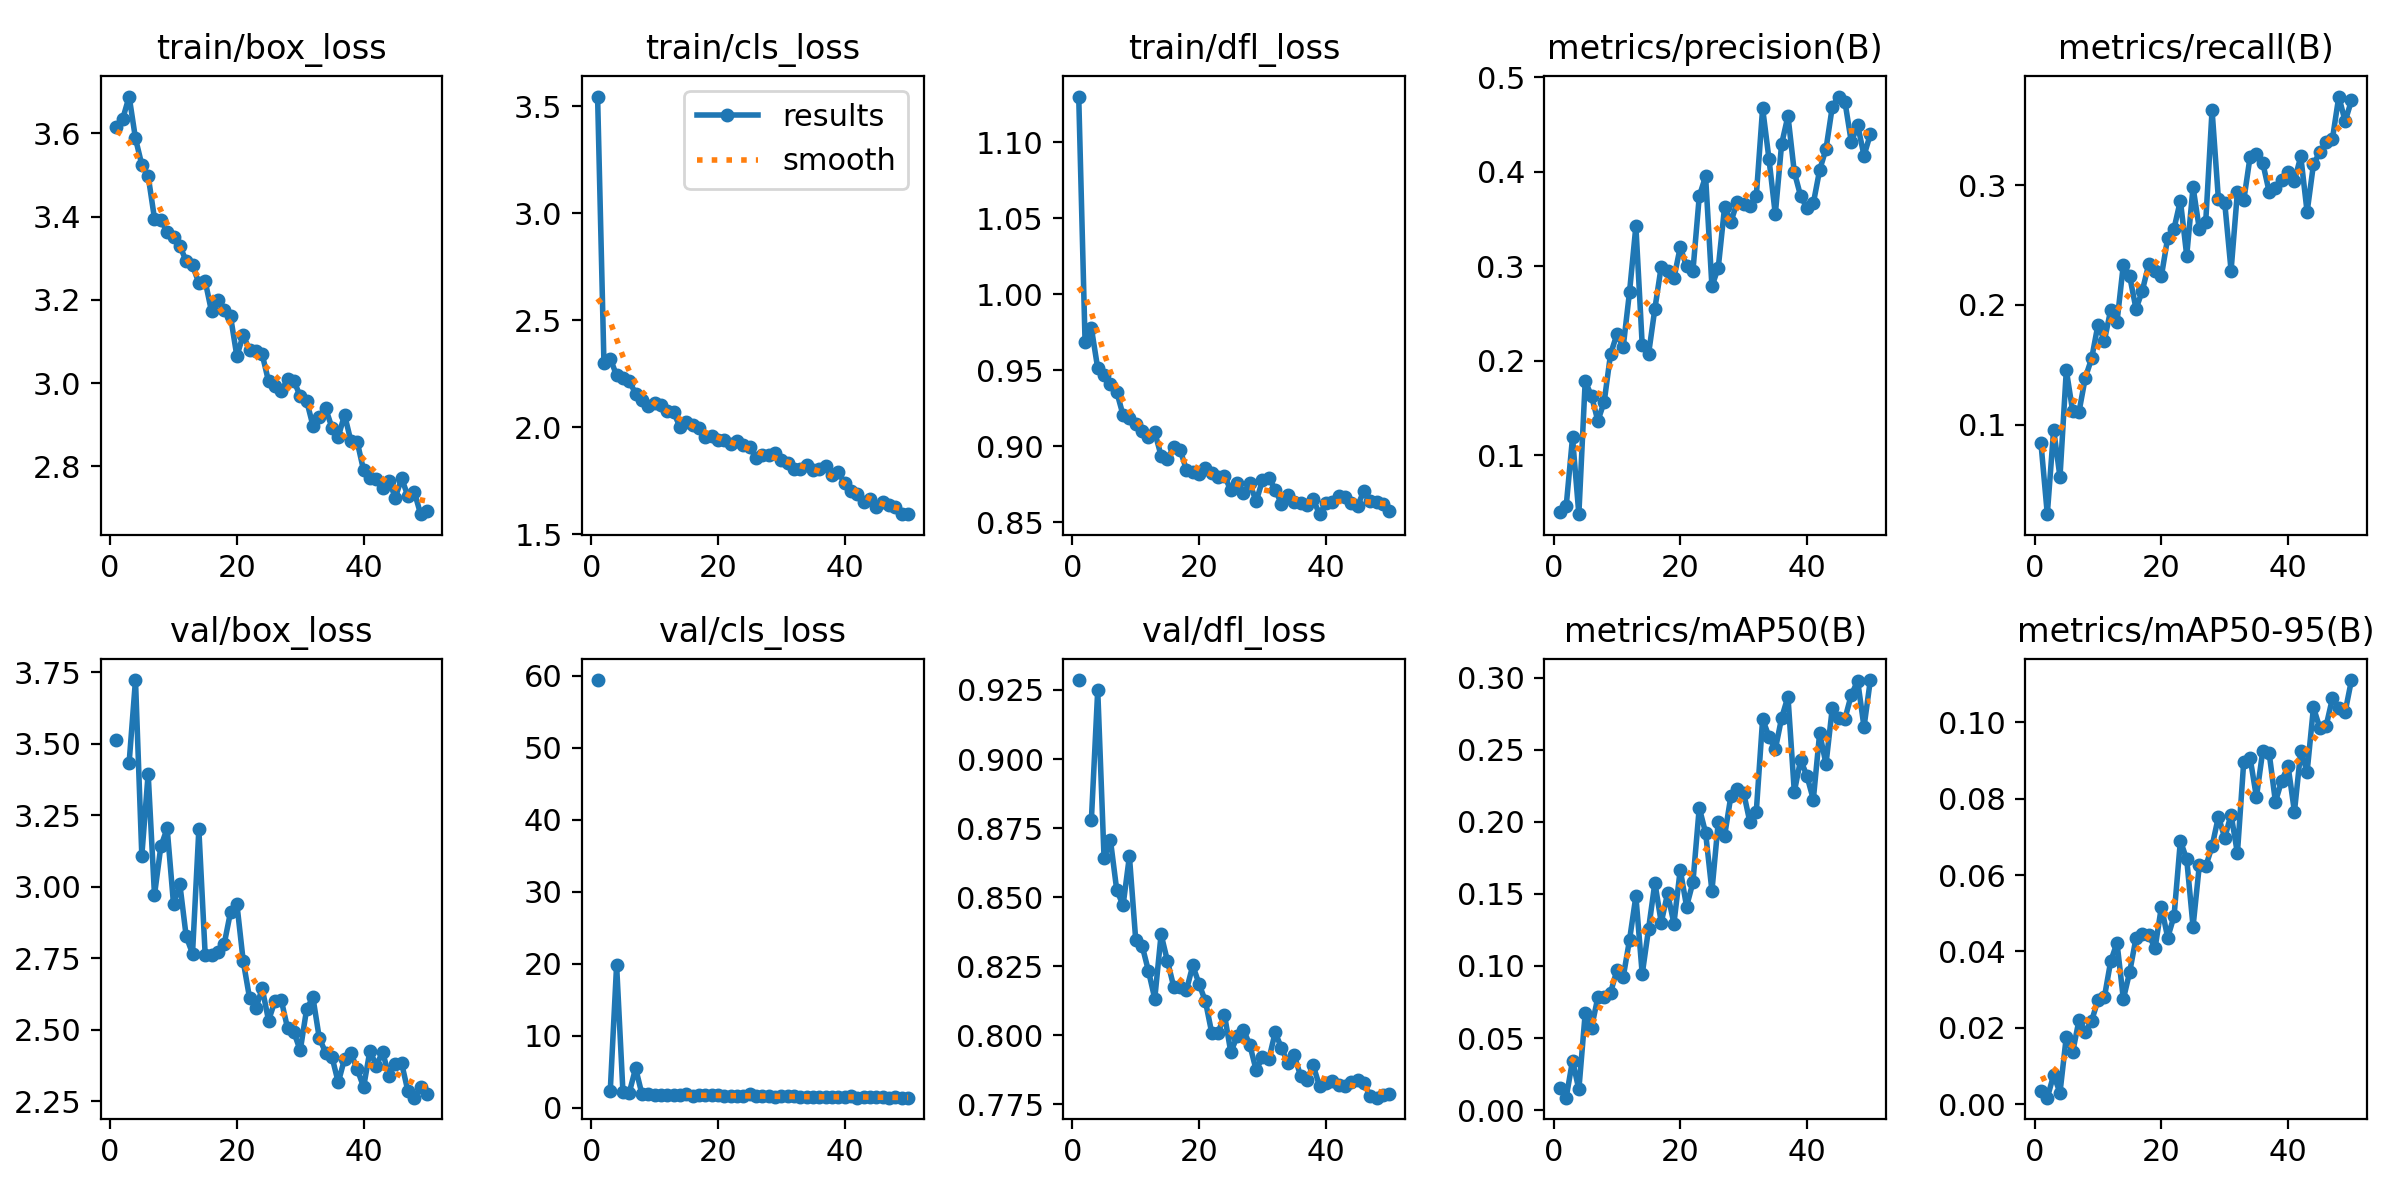

In [ ]:
Image(filename=f'/content/runs/detect/train4/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/WeedCrop-2/valid/labels.cache... 235 images, 0 backgrounds, 0 corrupt: 100% 235/235 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:05<00:00,  2.99it/s]
                   all        235       1605      0.426      0.371      0.297      0.111
                  crop        235         47       0.37      0.426      0.309       0.12
                  weed        235       1558      0.482      0.316      0.285      0.101
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/118 /content/WeedCrop-2/test/images/12122_jpg.rf.2c0efbdb351a8d5a53840ef1d95d27ec.jpg: 128x128 (no detections), 14.3ms
image 2/118 /content/WeedCrop-2/test/images/12198_jpg.rf.b2dabe651ca6a4440cd84c370f573076.jpg: 128x128 (no detections), 14.2ms
image 3/118 /content/WeedCrop-2/test/images/12205_jpg.rf.1fa46f698128453d5f55bb913a744729.jpg: 128x128 (no detections), 14.3ms
image 4/118 /content/WeedCrop-2/test/images/301_jpg.rf.d4ef66e53f2c8a6a33327eb7368c87d3.jpg: 128x128 (no detections), 14.3ms
image 5/118 /content/WeedCrop-2/test/images/310_jpg.rf.13a165ccee3024413e7b6e02df1334d7.jpg: 128x128 (no detections), 15.2ms
image 6/118 /content/WeedCrop-2/test/images/311_jpg.rf.344e36a809782462177cc6e0dba649cd.jpg: 128x128 (no detections), 13.9ms
image 7/118 /content/WeedCrop-2/test/images/317_jpg.rf.951e5c9fe986ea4eab6

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/WeedCrop-2/data.yaml epochs=50 imgsz=640 project='/content/Trained model'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/WeedCrop-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/Trained model, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

In [ ]:
!nvidia-smi
!pip install roboflow
!pip install ultralytics

from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
#!yolo mode=checks

from roboflow import Roboflow
rf = Roboflow(api_key="0LdY9PIK4CWIaAcf6fs9")
project = rf.workspace("elf-wbesr").project("weeddetectorr")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.196, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to weeddetectorr-1 in yolov8:: 100%|██████████| 8190/8190 [00:02<00:00, 2779.28it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 project='/content/Trained model 2'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/weeddetectorr-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/Trained model 2, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

In [ ]:
import torch
model = torch.load('/content/Trained model 2/train3/weights/best.pt')

In [ ]:
!yolo task=classify mode=predict model='/content/Trained model 2/train3/weights/best.pt' conf=0.8 source="/content/crop2.jpg"

WARNING ⚠️ conflicting 'task=classify' passed with 'task=detect' model. Ignoring 'task=classify' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25855393 parameters, 0 gradients, 78.8 GFLOPs

image 1/1 /content/crop2.jpg: 640x640 (no detections), 37.0ms
Speed: 4.7ms preprocess, 37.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


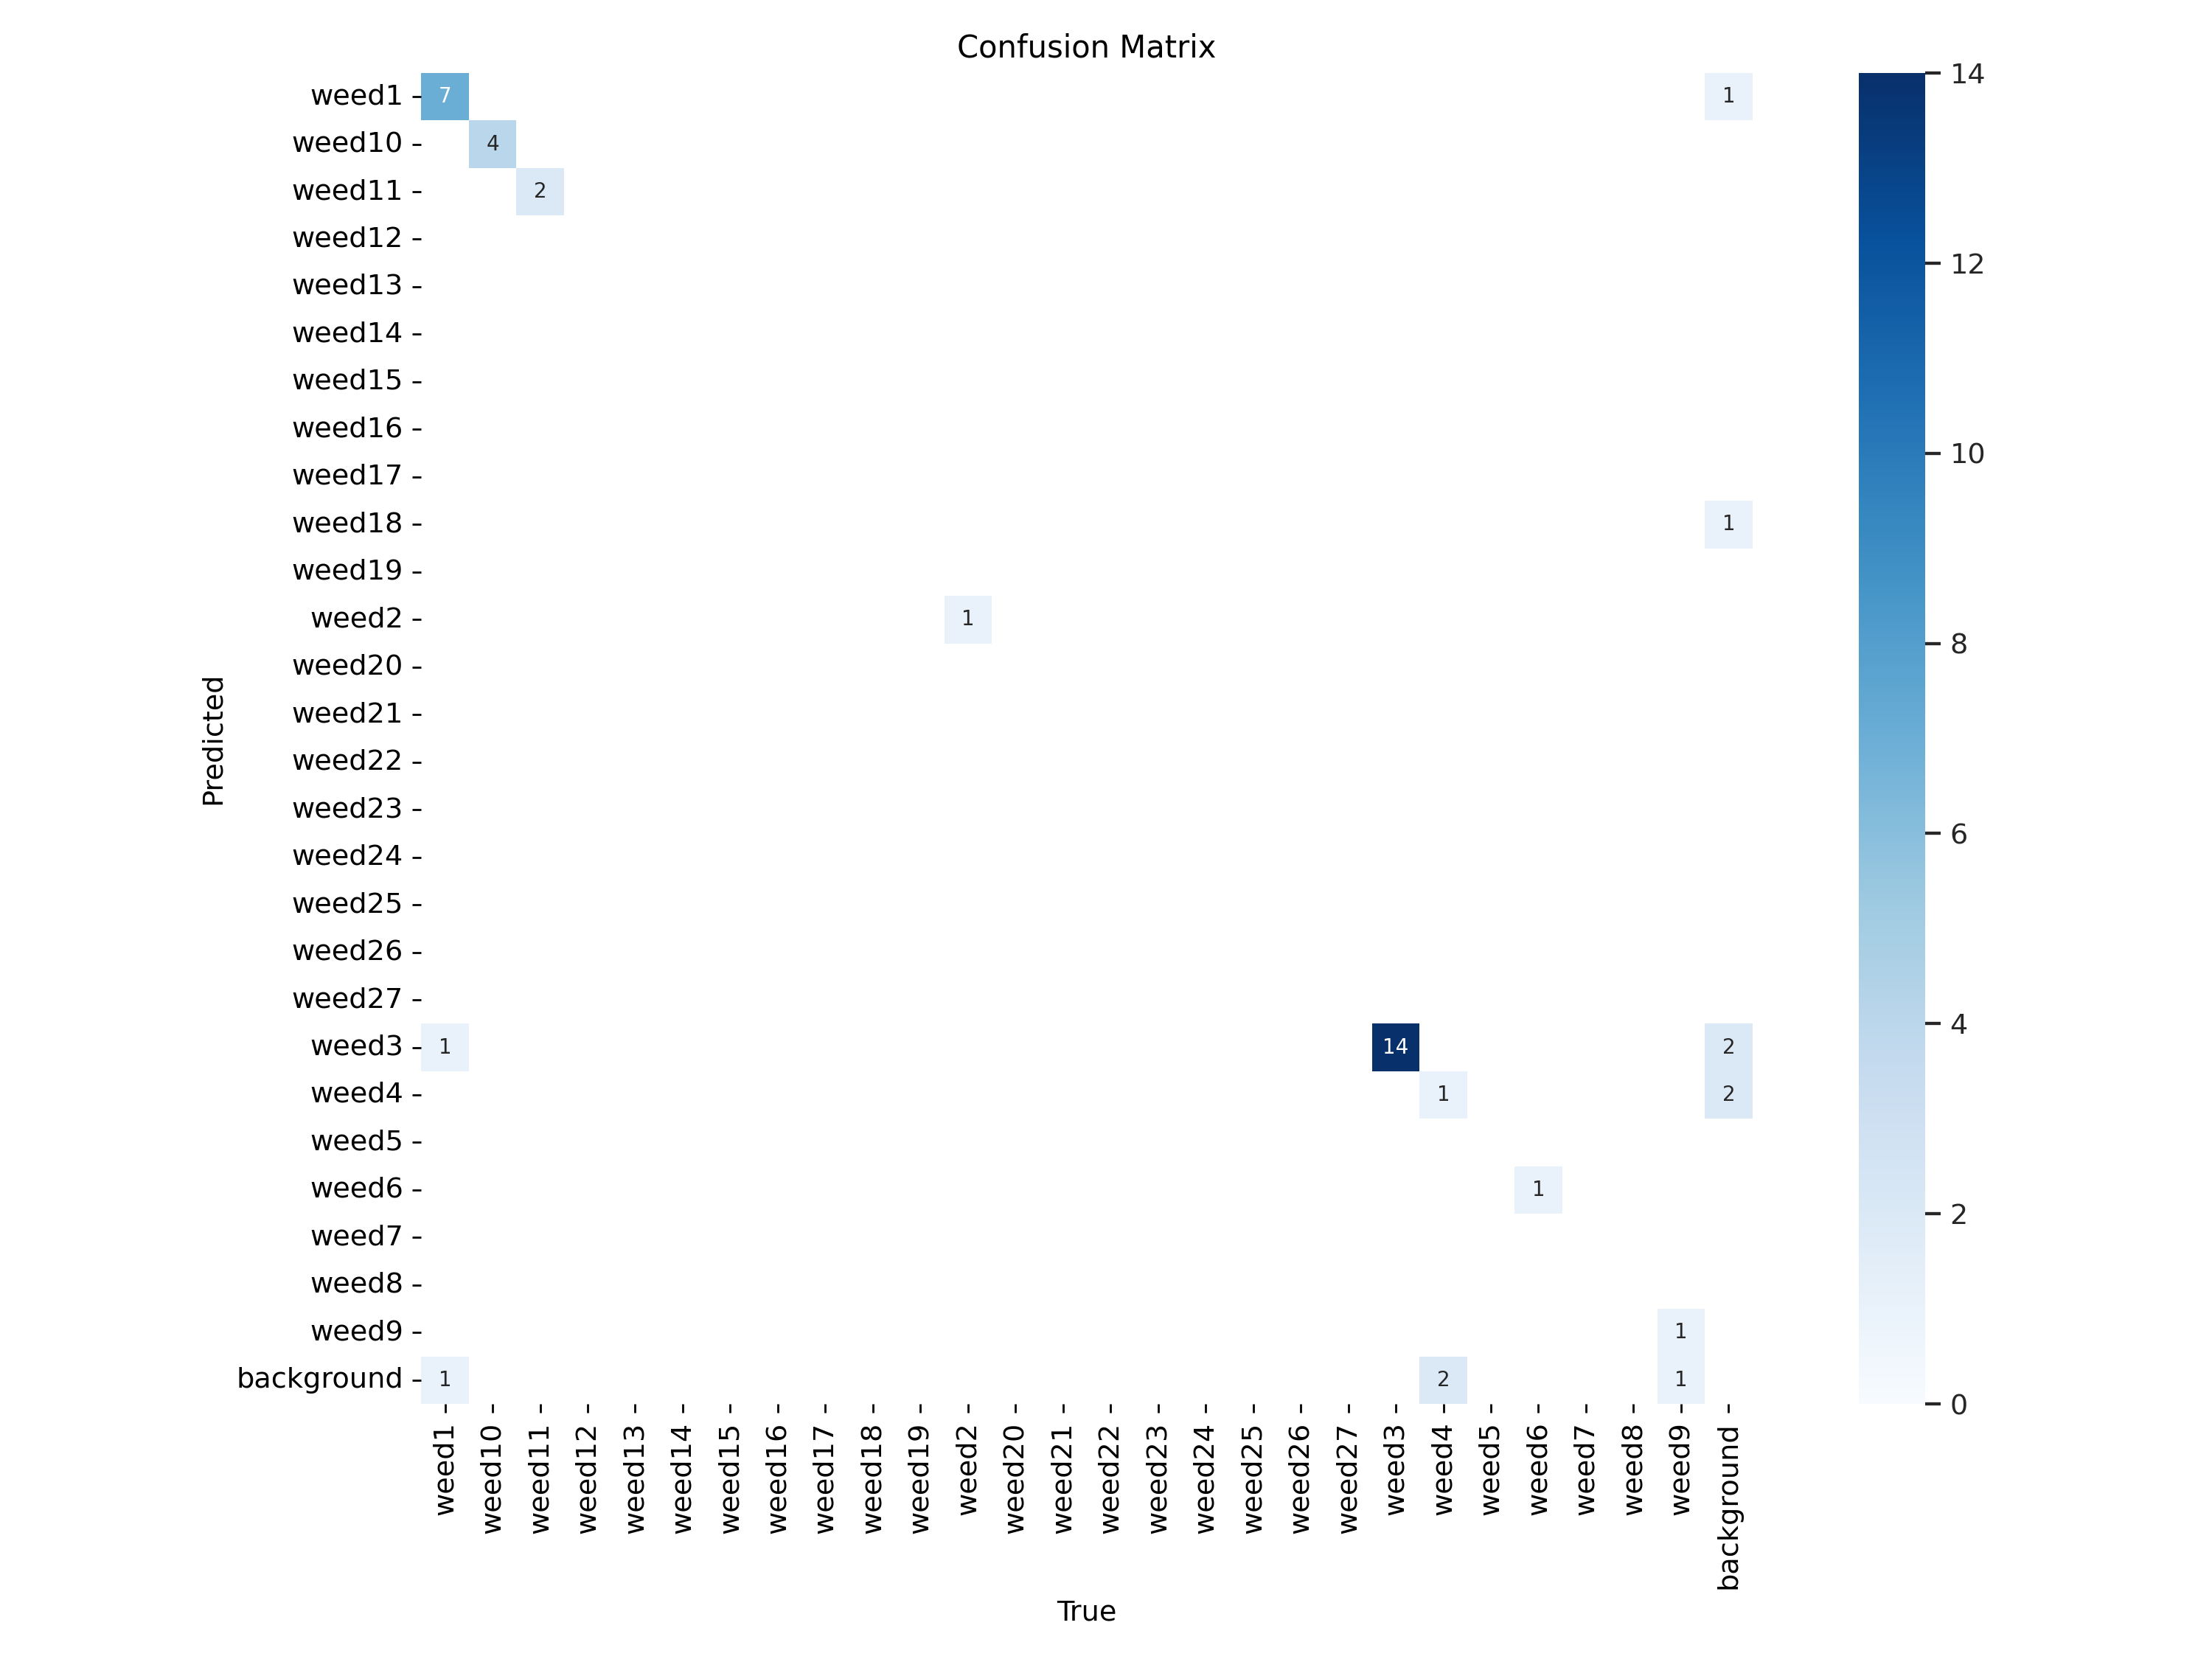

In [ ]:
Image(filename=f'/content/Trained model 2/train3/confusion_matrix.png', width=600)

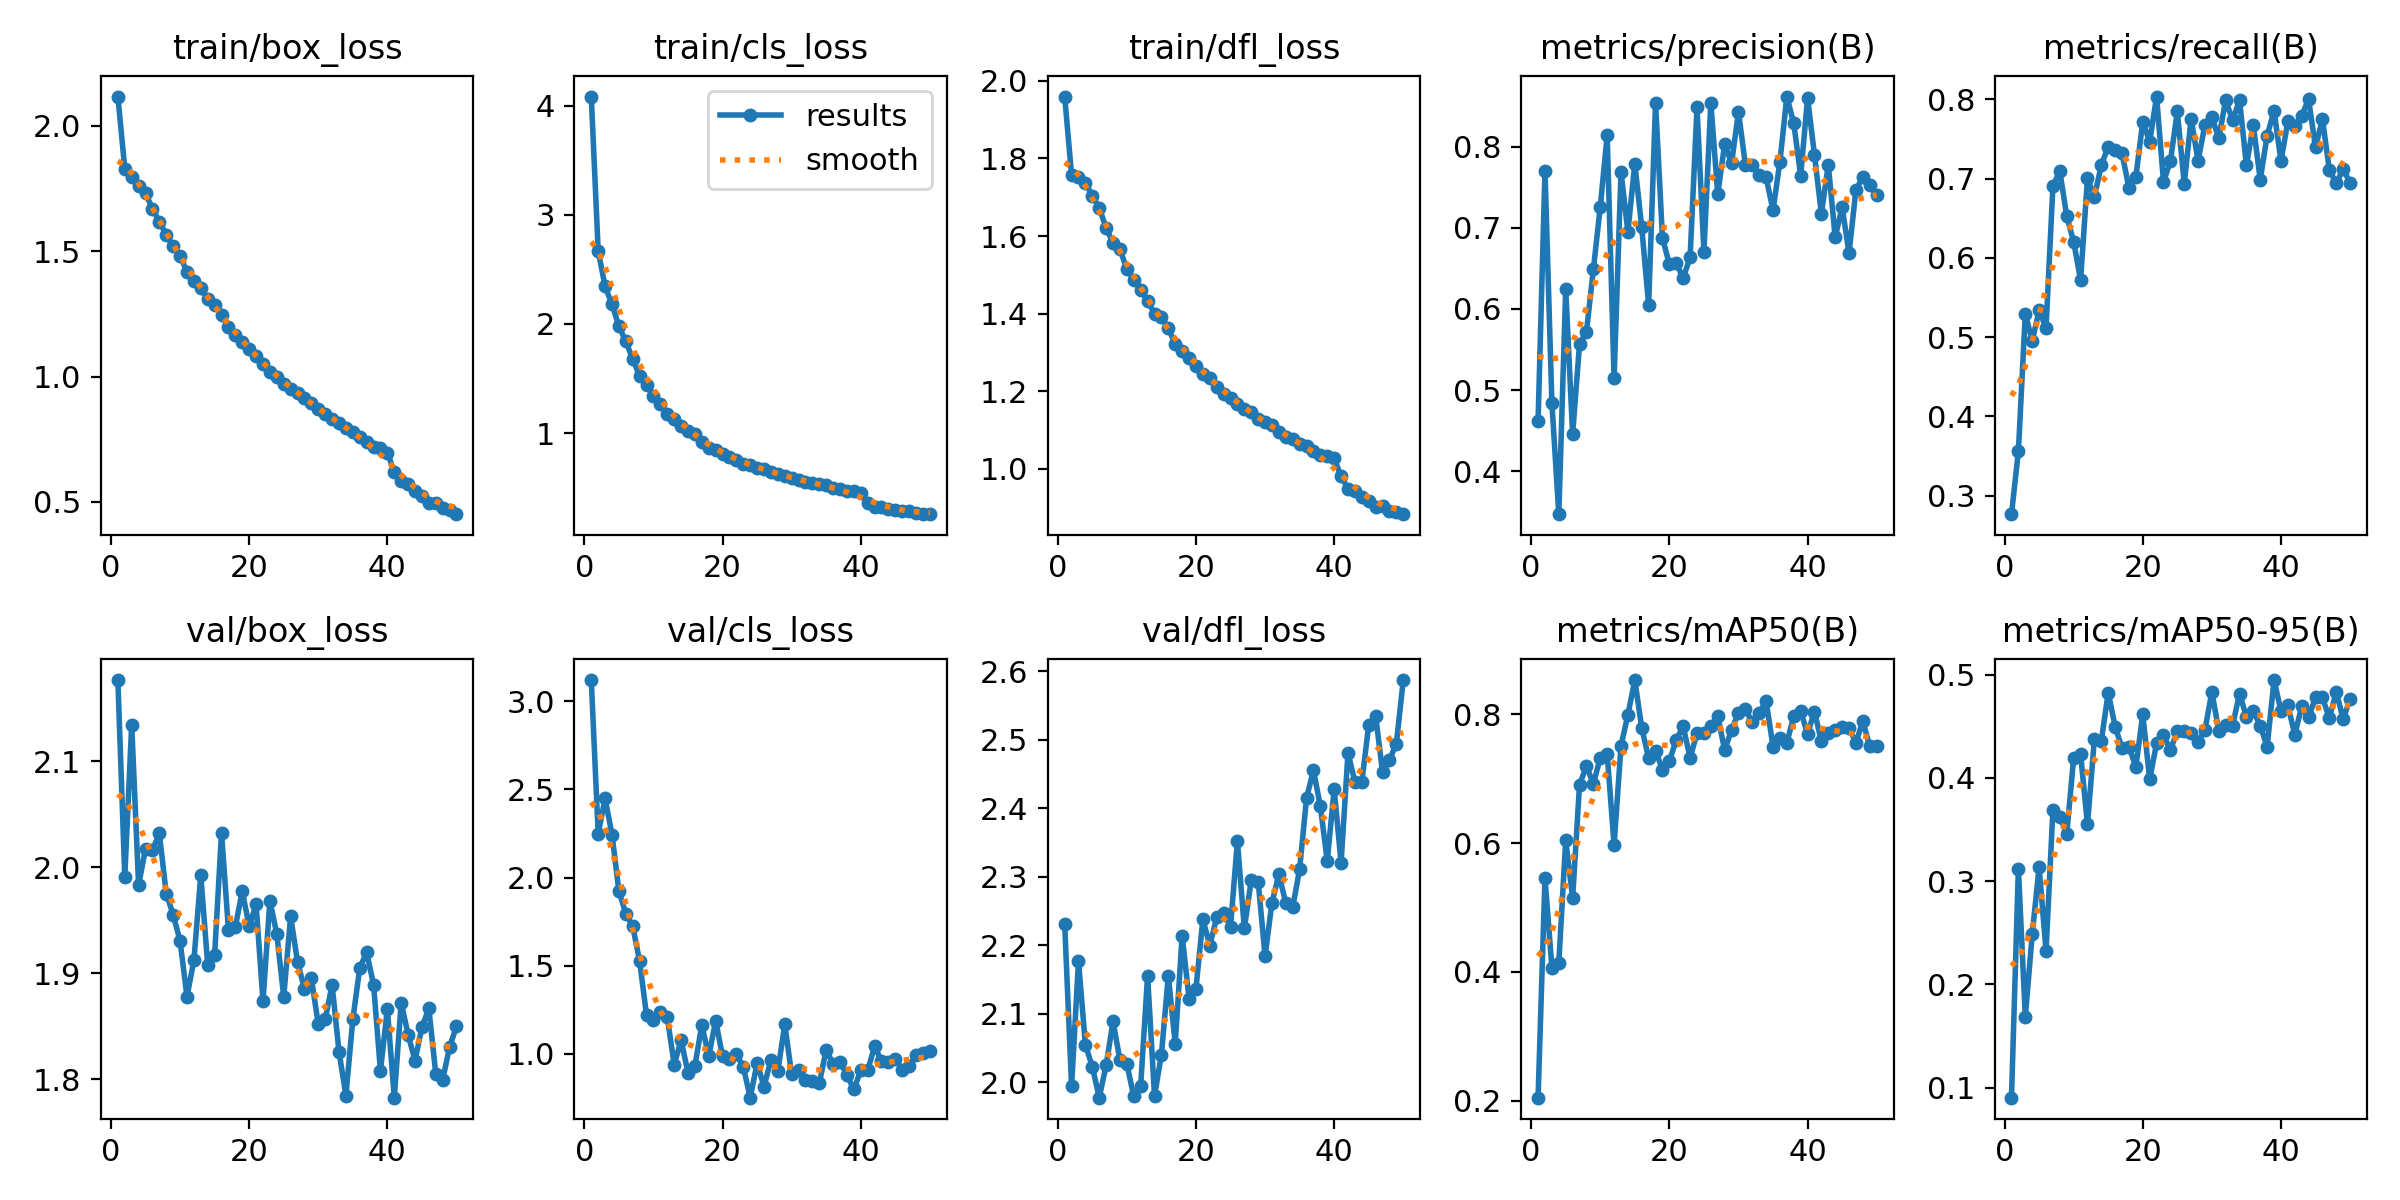

In [ ]:
Image(filename=f'/content/Trained model 2/train3/results.png', width=600)